# Popular Data Science Questions

In this project, you are working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms. You are tasked with figuring out what is best content to write about.

To begin, we can try and reference website like Stack Exchange. We will focus on Data Science Stack Exchange (DSSE) as it is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions. This makes it an ideal candidate for this investigation.

## Understanding Data Science Stack Exchange

We will have a quick look at DSSE to better understanding what it is about, so as to aid our analysis later.

### Type of questions on the site

* Make sure that the question is on-topic
* Avoid asking subjective questions
* Summarise the problem, provide details, and describe what were tried

### Other information on the site

* Tags to categorise questions to easily find and answer
* Users, which can be sorted by Reputation, New users, Voters, Editors and Moderators
* Unanswered questions with no upvoted or accepted answers

### Information available on each post

* Title of the post
* When the question was asked
* When the post was last active
* View counts of the post
* Details of the post
* Upvote/downvote of the post
* Answers, which can be sorted by Active, Oldest or Votes
* Upvote/downvote of the answer

### Exploring DSSE's data model

Stack Exchange provides a public database for each of its websites.

If we look at the Tags database,
* Top five tags are: machine-learning, python, deep-learning, neural-network, and classification

If we look at the Posts database, we could make use of the following to gauge the popularity level:
* PostTypeId
* CreationDate
* ViewCount
* Score
* Tags
* AnswerCount
* CommentCount
* FavoriteCount

## Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
questions = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_10\2019_questions.csv', parse_dates=['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
questions.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [5]:
questions['FavoriteCount'].unique()

array([nan,  1.,  2.,  3.,  0., 11.,  4.,  5.,  7.,  6., 16.,  8.])

We notice that there are missing values in `FavoriteCount` and it is formatted as `float64` type. To correct the missing values, we can replace the null value with 0 instead. Since the count should be integer, we can also format it as such.

For `Tags`, we notice that multiple tags are combined together and each tag is separated by `<>`, which can be used to seperate them into each unique tag.

In [6]:
# correct missing values in FavoriteCount with 0
questions['FavoriteCount'].fillna(0, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype('int64')

In [7]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$","", regex=True)
questions['Tags'] = questions['Tags'].str.split("><")

We now focus on determining the most popular tags. We will do so by considering two different popularity proxies. For each tag we will:
* count how many times the tag was used
* how many times a question with that tag was viewed

In [8]:
questions['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [9]:
tag_count_dict = {}

for tags in questions['Tags']:
    for t in tags:
        if t in tag_count_dict:
            tag_count_dict[t] += 1
        else:
            tag_count_dict[t] = 1          

In [10]:
tag_count = pd.DataFrame.from_dict(tag_count_dict, orient='index', columns=['count']).sort_values(by='count',ascending=False)

In [11]:
tag_count.head()

,count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935


In [12]:
tag_count_top20 = tag_count.iloc[0:20].copy()

tag_count_top20.sort_values(by='count',ascending=True,inplace=True)

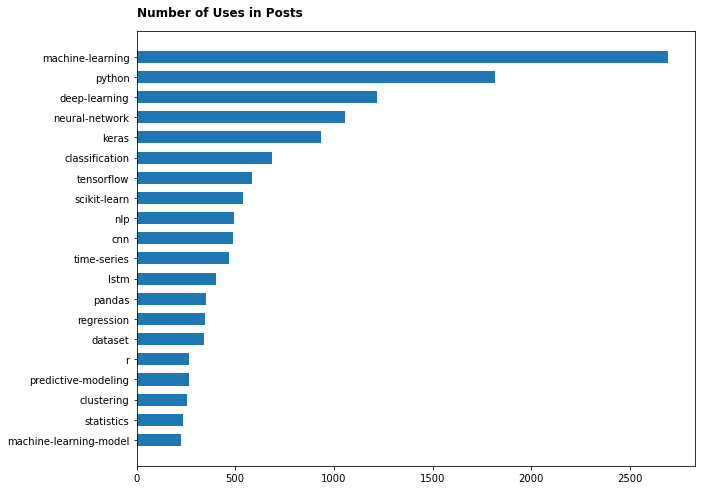

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(tag_count_top20.index, tag_count_top20['count'], height=0.6)
ax.text(x=0, y=21, s='Number of Uses in Posts', size=12, weight='bold')

plt.show()

In [14]:
tag_viewcount_dict = {}

for index, row in questions.iterrows():
    for tags in row['Tags']:
        if tags in tag_viewcount_dict:
            tag_viewcount_dict[tags] += row['ViewCount']
        else:
            tag_viewcount_dict[tags] = row['ViewCount']             

In [15]:
tag_viewcount = pd.DataFrame.from_dict(tag_viewcount_dict, orient='index', columns=['count']).sort_values(by='count',ascending=False)

In [16]:
tag_viewcount.head()

,count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787


In [17]:
tag_viewcount_top20 = tag_viewcount.iloc[0:20].copy()

tag_viewcount_top20.sort_values(by='count',ascending=True,inplace=True)

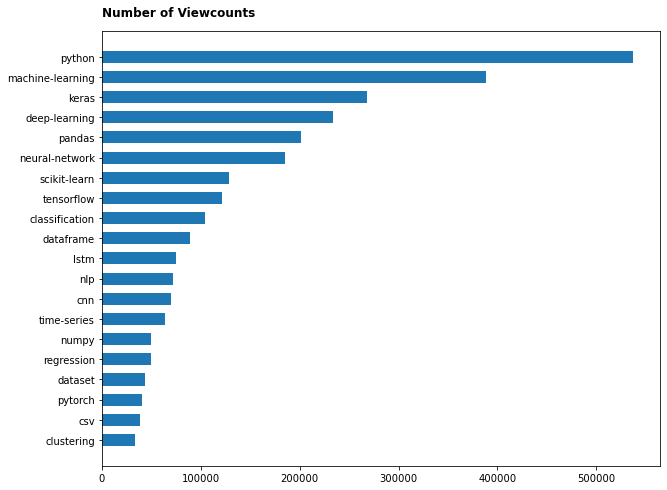

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(tag_viewcount_top20.index, tag_viewcount_top20['count'], height=0.6)
ax.text(x=0, y=21, s='Number of Viewcounts', size=12, weight='bold')

plt.show()

## Relations Between Tags

In [19]:
#tag_viewcount_top20
#tag_count_top20

in_used = pd.merge(tag_count_top20, tag_viewcount_top20, how='left', left_index=True, right_index=True, suffixes=['_count','_viewcount'])
in_used.head(20)

,count_count,count_viewcount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [20]:
in_view = pd.merge(tag_count_top20, tag_viewcount_top20, how='right', left_index=True, right_index=True, suffixes=['_count','_viewcount'])
in_view.head(20)

,count_count,count_viewcount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


## Domain Knowledge

In [21]:
common_topic = set(in_view.tail(10).index).intersection(in_used.tail(10).index)
print(common_topic)

{'scikit-learn', 'neural-network', 'machine-learning', 'deep-learning', 'tensorflow', 'keras', 'classification', 'python'}


We notice that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`.

By comparing across the tags, we can deduce that deep learning is a popular topic.

## Is Deep Learning Just a Fad? 

The file `all_questions.csv` holds the result of the query that fetches all of the questions ever asked on DSSE, their dates and tags.

In this we will track the interest in deep learning across time. We will:
* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [22]:
all_questions = pd.read_csv(r"C:\Users\Andy\Desktop\Learning\Dataquest\Project_10\all_questions.csv",parse_dates=['CreationDate'])

In [23]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [24]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [25]:
all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$","", regex=True)
all_questions['Tags'] = all_questions['Tags'].str.split("><")

### Deciding Deep Learning questions

From the list of the tags in common, we will classify questions with related tags as deep learning related questions.

In [26]:
deep_learning_related = ['deep-learning','neural-network','keras','tensorflow','scikit-learn','cnn','lstm']

In [27]:
def dl_related(x):
    for t in x:
        if t in deep_learning_related:
            return 1;
    return 0;

In [28]:
all_questions['dl_related'] = all_questions['Tags'].apply(dl_related)

In [29]:
all_questions.sort_values('CreationDate').tail()

,Id,CreationDate,Tags,dl_related
21320,66684,2020-01-18 21:17:34,"[machine-learning, python, matplotlib, csv]",0
21321,66685,2020-01-18 23:56:27,"[machine-learning, nlp, named-entity-recognition]",0
21322,66686,2020-01-19 00:49:00,"[data-mining, bigdata, association-rules]",0
21323,66690,2020-01-19 02:21:53,"[keras, gan]",1
21324,66691,2020-01-19 03:01:03,"[python, pandas, anaconda, statsmodels]",0


We will track interest in deep learning across a quarterly basis.

Since only have data up till 2020-01-19, we will remove data that is from 2020 onwards

In [30]:
all_questions = all_questions[all_questions['CreationDate'].dt.year < 2020]

We will now need to classify each entry into quarter basis.

In [31]:
def classify_quarter(x):
    year = str(x.year%2000)
    month = str((x.month-1) // 3 + 1)
    return year + 'Q' + month

In [32]:
all_questions['quarter'] = all_questions['CreationDate'].apply(classify_quarter)

In [33]:
all_questions.head()

,Id,CreationDate,Tags,dl_related,quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In [51]:
quarterly = all_questions.pivot_table(values='dl_related', index='quarter', aggfunc=(np.size,np.sum)).reset_index().rename(
    {'sum':'DeepLearningQuestions', 'size':'TotalQuestions'}, axis=1)

In [55]:
quarterly['%_DL_Qns'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions'] * 100

In [57]:
quarterly.sort_values('%_DL_Qns',ascending=False).head()

,quarter,TotalQuestions,DeepLearningQuestions,%_DL_Qns
15,18Q1,1221,554,45.372645
17,18Q3,1512,685,45.304233
18,18Q4,1294,531,41.035549
19,19Q1,1987,804,40.463010
22,19Q4,2036,809,39.734774


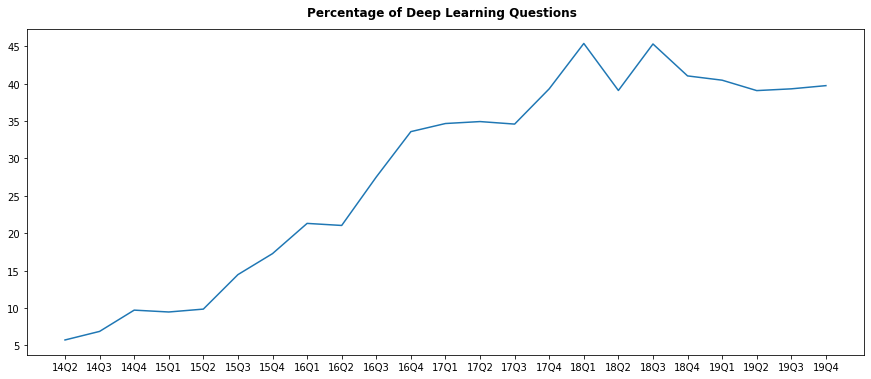

In [75]:
fig, ax = plt.subplots(figsize = (15,6))

ax.plot(quarterly['quarter'], quarterly['%_DL_Qns'])

ax.text(x=7, y=49, s='Percentage of Deep Learning Questions', size=12, weight='bold')

plt.show()

It looks like the percentage of deep learning related questions posted on DSSE had increased over the years, and looks like it has reached a steady state. There is still a relatively high interest level in deep learning given that it accounts for almost half of the total questions posted.